# Spam Detector

In [124]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [125]:
# nltk.download()

In [126]:
df = pd.read_csv('spam.csv', encoding="latin-1")

## Data Pre-processing

In [127]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [128]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [129]:
df.columns = ['class','SMS']

In [130]:
df['label'] = df['class'].map({'ham': 0, 'spam': 1})

### Clean text

#### Remove Punctuation

In [131]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
def remove_punctuation(txt):
    clean_txt = "".join([char for char in txt if char not in string.punctuation])
    return clean_txt

In [133]:
df['SMS_rm_punc'] = df['SMS'].apply(lambda x: remove_punctuation(x))

### Tokenization

In [134]:
# Separates text 
def tokenize (txt):
    tokens = re.split('\W+',txt)
    return tokens

In [135]:
df['SMS_Token'] = df['SMS_rm_punc'].apply(lambda x: tokenize(x))

### Remove stopwords

In [136]:
# Get all the english stop words
english_stopword = stopwords.words("english")

In [137]:
# Separates text 
def remove_stopwords (txt):
    clean_txt = [word for word in txt if word not in english_stopword]
    return clean_txt

In [138]:
df['SMS_rm_punc'] = df['SMS_Token'].apply(lambda x: remove_stopwords(x))

### Lemmatizing

In [139]:
wnl = nltk.WordNetLemmatizer()

def lemmatizing (txt):
    txt = [wnl.lemmatize(word) for word in txt]
    return txt

In [143]:
df['SMS_lema'] = df['SMS_rm_punc'].apply(lambda x: lemmatizing(x))

## Frequency words

In [150]:
df.head()

,class,SMS,label,SMS_rm_punc,SMS_Token,SMS_lema
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[Go, jurong, point, crazy, Available, bugis, n...","[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[Nah, I, dont, think, goes, usf, lives, around...","[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, go, usf, life, around, t..."


### Data Visualization

In [162]:
df.groupby('class').describe()

label                                   
        count mean  std  min  25%  50%  75%  max
class                                           
ham    4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam    747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [36]:
df['SMS_len'] = df['SMS'].apply(lambda x: len(x)-x.count(" "))

In [33]:
def count_punc(txt):
    sum_punc = sum([1 for char in txt if char in string.punctuation])
    return sum_punc

In [34]:
df['amount_of_punc'] = df['SMS'].apply(lambda x: count_punc(x))

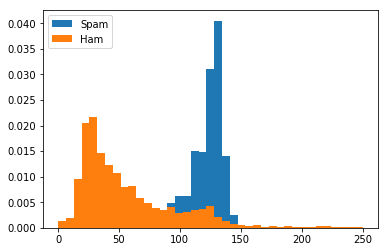

In [55]:
bins = np.linspace(0, 250, 40)
plt.hist(df[df['label']==1]['SMS_len'],bins, normed=True, label ='Spam') 
plt.hist(df[df['label']==0]['SMS_len'],bins, normed=True, label ='Ham')
plt.legend(loc='upper left')
#xlabel ='Ham', ylabel = 'freq', title = 'Histogram', grid=True)
plt.show()

In [119]:
def count_nums(txt):
    sum_punc = sum([1 for char in txt if char in range(0,9)])
    return sum_punc

In [120]:
df['amount_of_numbers'] = df['SMS'].apply(lambda x: count_nums(x))

## Vectorizing Data

### Bag-Of-Words

In [ ]:
cv = CountVectorizer()
features = cv.fit_transform(df['SMS'])

## Modeling

In [113]:
labels = df['label']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [115]:
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1587
          1       0.93      0.92      0.92       252

avg / total       0.98      0.98      0.98      1839

